# PME3481 - Controle e Aplicações

### Configuração do Ambiente e Bibliotecas

Introdução das bibliotecas mais importantes.

In [24]:
%matplotlib inline

import numpy as np
import control as ctrl
from scipy import signal
import matplotlib.pyplot as plt
import sympy as sy
from tbcontrol.symbolic import routh
import tbcontrol
tbcontrol.expectversion('0.1.8')
import tbcontrol.symbolic

import warnings
warnings.filterwarnings('ignore')

## Forma Linearizada

Dadas as equações não lineares deduzidas pela formualação de Newton-Euler, foi possível desenvolver as formas linearizadas com o auxílio das bibliotecas sympy e tbcontrole.

In [25]:
sy.init_printing()
s = sy.Symbol('s')

### Modelo Linearizado

Lista de constantes

In [26]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

In [27]:
# X = [x,y,theta,xp,yp,thetap]
# Xp = [xp,yp,thetap,xpp,ypp,thetapp]
A = np.array([[0, 0, 0, 1],
              [(1/M)*((1/2)*dar*Cd*Vxlin**2*L*Df), (1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [(1/M)*(-M*g+(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2)), 0, 0, 0],
              [(1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)), 0, 0, 0]])

B = np.array([[0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

C = np.array([[ 1, 0, 0, 0],
              [ 0, 1, 0, 0],
              [ 0, 0, 1, 0],
              [ 0, 0, 0, 1]])

D = np.array([[ 0, 0],
              [ 0, 0],
              [ 0, 0],
              [ 0, 0]])

cont = ctrl.StateSpace(A, B, C, D)

sys = ctrl.ss(A, B, C, D)
sys

<LinearIOSystem:sys[5]:['u[0]', 'u[1]']->['y[0]', 'y[1]', 'y[2]', 'y[3]']>

### Polos, Frequências Naturais e Fatores de Amortecimento

In [28]:
wn, zeta, poles = cont.damp()

print("Frequências Naturais: ")
print(wn)
print("Polos: ")
print(poles)
print("Amortecimento: ")
print(zeta)

Frequências Naturais: 
[0.00253575 0.         0.07190375 0.07190375]
Polos: 
[-0.00253575+0.j  0.        +0.j  0.07190375+0.j -0.07190375+0.j]
Amortecimento: 
[ 1. nan -1.  1.]


Abaixo há, também, o gráfico dos polos do sistema no plano complexo

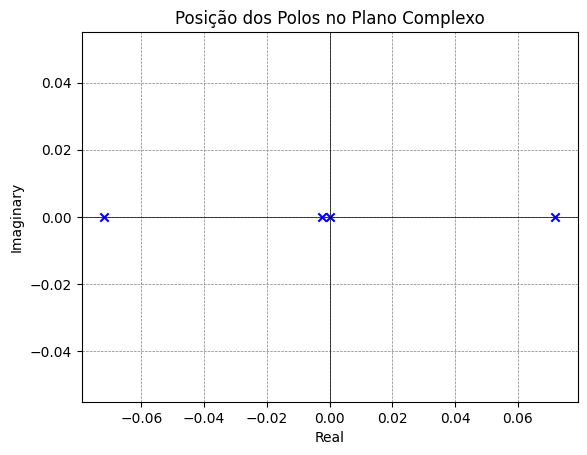

In [29]:
# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

### O Critério de Routh-Hurwitz

In [30]:
# Calcula o polinômio característico
char_poly = sy.Poly(np.poly(A), s)
# char_poly = sy.Poly(np.poly(A.ravel()), s)
char_poly

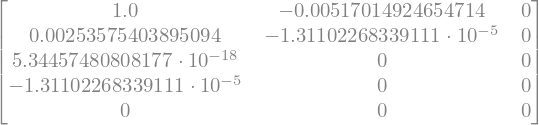

In [31]:
rhm = routh(char_poly)
rhm

## Resposta em Frequência

### Funções de Transferência

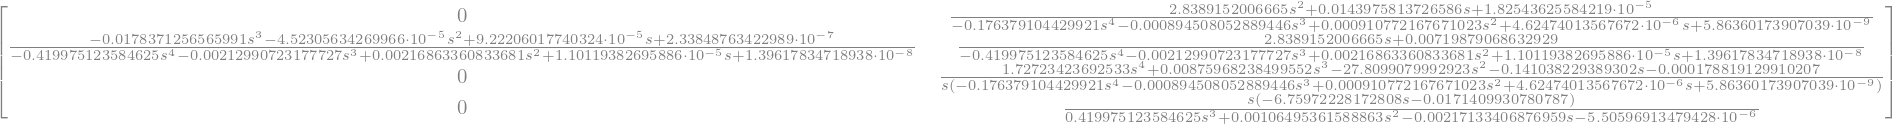

In [32]:
s = sy.symbols('s')
G = sy.simplify(tbcontrol.symbolic.ss2tf(A, B, C, D, s), simplify=False)
G

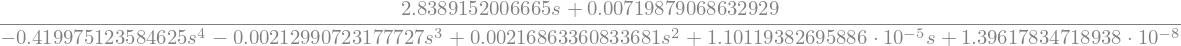

In [33]:
G[3]